# PROBLEM 1

The Intel Xeon Platinum 8168 processor can handle about 2.69 TFLOPS (trillion floating-point operations per second) 
when it uses a special feature called AVX-512. This speed comes from its 24 cores working together, running at up to 2.8 GHz,
and doing 16 calculations per core per cycle.

If you want a cluster of CPUs that can reach 100 TFLOPS, here’s how you figure out how many you need:

Processors Needed= Goal/Power of One CPU = 100/2.69  ≈37.17

Since you can’t use part of a processor, you’d need 38 processors to hit the 100 TFLOPS target.

SOURCES

1. Colfax Research on AVX-512
https://colfaxresearch.com/xeon-2017/

2. Intel Xeon Platinum 8168 Specifications
https://technical.city/en/cpu/Xeon-Platinum-8168

# PROBLEM 2

This code has two problems -
1st: The list 'a' should have been a numpy array, This can be easily fixed by using arange function of numpy.
otherwise if you multiply a list by 13,
you get the list elements repeated 13 times.
2nd: The print statement should have an f string.
Also the indexing of b needs to be changed in the print statement
Here is the actual working code:

In [10]:
import time
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import math




a = np.arange(1,11)
b=a*13
# print(a[1])

for i in range(1,11):
    print(f'{i}x13 = {b[i-1]}')

1x13 = 13
2x13 = 26
3x13 = 39
4x13 = 52
5x13 = 65
6x13 = 78
7x13 = 91
8x13 = 104
9x13 = 117
10x13 = 130


# PROBLEM 3

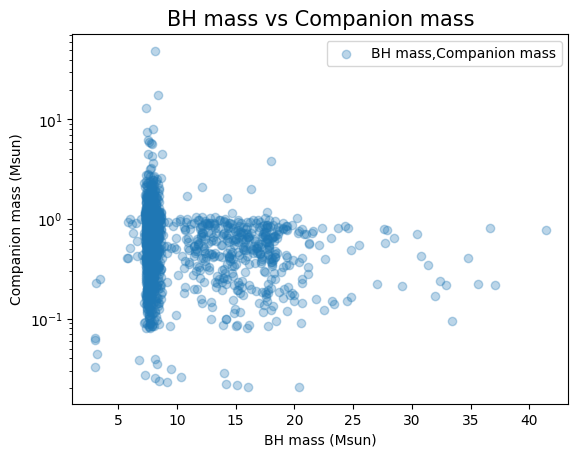

In [13]:
Orbital_period,Eccentricity,BH_mass,Companion_mass,Age = [],[],[],[],[]
counter = 0

with open('HW1_data.txt','r') as astronomy:
    for line in astronomy:
        if counter > 0:
            a = line.split(',')
            Orbital_period.append(float(a[0]))
            Eccentricity.append(float(a[1]))
            BH_mass.append(float(float(a[2])))
            Companion_mass.append(float(a[3]))
            Age.append(float(a[4][:-1]))
        counter += 1 
      
# print(Orbital_period)

plt.figure(1)

plt.scatter(BH_mass,Companion_mass,alpha=0.3,label = 'BH mass,Companion mass')
plt.xlabel('BH mass (Msun)')
plt.ylabel('Companion mass (Msun)')
plt.title('BH mass vs Companion mass',size = 15)
plt.yticks([0.1,1,10,20,30,40,50])
plt.yscale('log')
plt.legend()

332055425.667908 , 0.076866


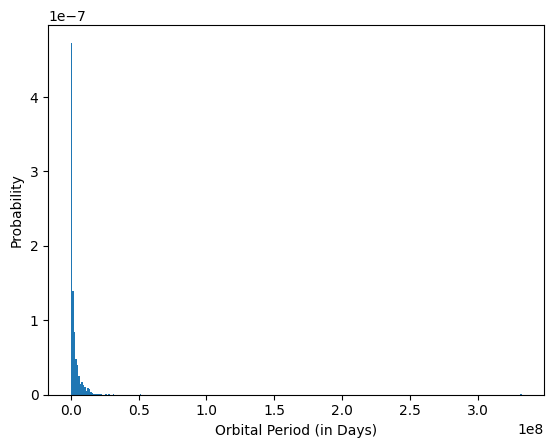

In [14]:
plt.figure(2)

plt.hist(Orbital_period,bins = 300,density=True)
# plt.yscale('log')
# plt.xscale('log')
plt.xlabel('Orbital Period (in Days)')
plt.ylabel('Probability')

print(max(Orbital_period),",",min(Orbital_period))

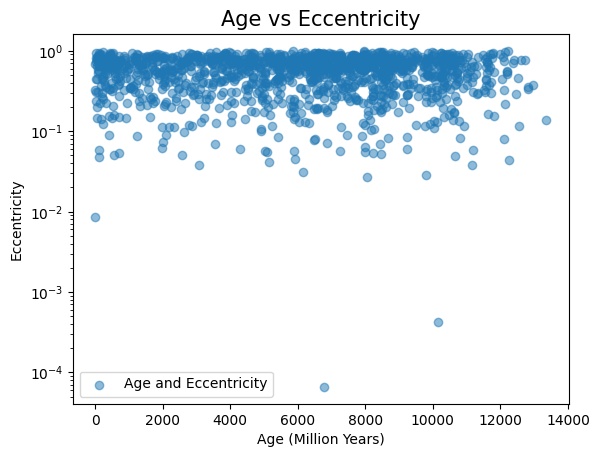

In [15]:
plt.figure(3)

plt.scatter(Age,Eccentricity,alpha=0.5,label = 'Age and Eccentricity')
plt.xlabel('Age (Million Years)')
plt.ylabel('Eccentricity')
plt.title('Age vs Eccentricity',size = 15)
plt.yticks([0.1,1,10,20,30,40,50])
plt.yscale('log')
plt.legend()
plt.show()

# PROBLEM 4 (a)

In [17]:
def binary(number):
    number = float(number)
    a,b=str(number).split('.')
    integer = ' '
    quotient = a

    while float(quotient) > 1:
        temp_quotient = float(quotient)//2
        remainder = float(quotient)%2
        quotient = temp_quotient
        binary = str(remainder)[0]
        integer += binary

    if number >1:
        integer += '1'
    else:
        integer += '0'
    integer1 = integer[::-1]

    decimal = ''
    fraction = number -float(a)
    
    for i in range(0,6):
        temp = str(fraction*2)[0]
        temp2 = (fraction*2)%1
        fraction = temp2
        decimal += temp

    print(integer1[0:len(integer1)-1]+'.'+ decimal)
    return float(integer1[0:len(integer1)-1]+'.'+ decimal)

    
binary(8)

1000.000000


1000.0

# PROBLEM 4 (b)

In [ ]:
# The Binary function defined above has lot of flaws(that make it useless in this part), 
# so I had to change it in this part.


def fractionToBinary(fraction):
    result = ""
    while fraction > 0:
        fraction = fraction * 2
        if fraction >= 1:
            result += '1'
            fraction -= 1
        else:
            result += '0'
    if result == "":
        result = "0"
    return result

def convertToIEEE(real):
    if real < 0:
        sign = 1
        real = -real
    else:
        sign = 0

    int_part = int(real)
    frac_part = real - int_part
    
    int_bin = ""
    if int_part == 0:
        int_bin = "0"
    else:
        while int_part > 0:
            int_bin = str(int_part % 2) + int_bin
            int_part = int_part // 2

    frac_bin = fractionToBinary(frac_part)
    
    total_bin = int_bin + '.' + frac_bin
    
    position_of_first_one = total_bin.find('1')
    if position_of_first_one == -1:
        position_of_first_one = 0
    
    exponent = (position_of_first_one - 1) + 1023
    exponent_bin = bin(exponent)[2:]
    
    mantissa = total_bin[position_of_first_one + 1:]
    
    if len(mantissa) < 52:
        for _ in range(52 - len(mantissa)):
            mantissa += '0'
    
    mantissa = mantissa[:52]

    return sign, exponent_bin.zfill(11), mantissa



print(convertToIEEE(123.456))

'==============================================================================='

# PROBLEM 4(c)

In [ ]:
def ieeeToReal(ieee_32):
    mantissa_str = ieee_32[11:]
    mantissa_int = 0
    power_count = -1
    for i in range(len(mantissa_str)):
        bit = int(mantissa_str[i])
        mantissa_int += bit * pow(2, power_count)
        power_count -= 1
    mantissa_int = mantissa_int + 1

    sign_bit = int(ieee_32[0])
    if sign_bit == 1:
        sign = -1
    else:
        sign = 1

    exponent_str = ieee_32[1:9]
    exponent_bias = 0
    for j in range(len(exponent_str)):
        exponent_bias += int(exponent_str[j]) * pow(2, len(exponent_str) - 1 - j)

    exponent_unbias = exponent_bias - 127

    real_no = 1.0 * mantissa_int * pow(2, exponent_unbias)
    
    real_no = sign * real_no
    
    return real_no


print(ieeeToReal('01000000010010010000111111011010100100000000000000000000'))

# PROBLEM 5 (a,b)

Smallest possible real non-zero positive floating point number in double precision is :
2.2250738585072014 × 10^(−308)

in IEEE754 Notation we write it as:
0 00000000001 0000000000000000000000000000000000000000000000000

# PROBLEM 6

In [21]:
# Part A

def factorial(n):
    if n == 0:
        return 1
    else:
        fact = 1
        for i in range(1, n + 1):
            fact = fact * i
        return fact

In [24]:
# Part B

def exponential_taylor(x):
    result = 0
    term = 1
    n = 0
    
    while True:
        current_factorial = factorial(n)
        term = (x ** n) / current_factorial
        
        result += term

        if term < 0.0000000001:
            break
        
        n += 1

    return result

In [25]:
# PART C

import time

x_values = [0.1, 20]

for x in x_values:

    start_time = time.time()
    result = exponential_taylor(x)
    end_time = time.time()
    print(f"e^{x} = {result}")
    print("Time taken: " + str(end_time - start_time) + " seconds")
    print("-----------------------")

e^0.1 = 1.1051709180753966
Time taken: 0.0 seconds
-----------------------
e^20 = 485165195.40979016
Time taken: 0.0 seconds
-----------------------


In [26]:
# PART 4

def exponential_rec(x):
    term = 1
    cumulative_sum = term
    n = 1
    terms = [term]
    cumulative_sums = [cumulative_sum]
    
    while True:
        term = term * (x / n)
        cumulative_sum += term
        terms.append(term)
        cumulative_sums.append(cumulative_sum)
        
        if abs(term) < 0.0000000001:
            break
        
        n += 1
    
    return cumulative_sum, terms, cumulative_sums

In [27]:
# PART 5

import time

def compare_timing(x_values):
    for x in x_values:
        print(f"\nCalculating e^{x}...")

        start_time = time.time()
        result_rec, terms_rec, cumulative_rec = exponential_rec(x)
        end_time = time.time()
        print(f"Recurrence Relation Result: e^{x} = {result_rec}")
        # print("Terms:", terms_rec)
        # print("Cumulative Sums:", cumulative_rec)
        print(f"Time taken (recurrence relation): {end_time - start_time} seconds")
        
        start_time = time.time()
        result_taylor = exponential_taylor(x)
        end_time = time.time()
        print(f"Taylor Series Result: e^{x} = {result_taylor}")
        print(f"Time taken (Taylor series): {end_time - start_time} seconds")

In [28]:
# PART 6

import numpy as np

def compare_with_numpy(x_values):
    for x in x_values:
        numpy_result = np.exp(x)
        recurrence_result, terms_rec, cumulative_rec = exponential_rec(x)
        discrepancy = abs(recurrence_result - numpy_result)
        print(f"\nNumPy Result for e^{x}: {numpy_result}")
        print(f"Recurrence Relation Result for e^{x}: {recurrence_result}")
        # print(f"Terms Calculated: {terms_rec}")
        # print(f"Cumulative Sums: {cumulative_rec}")
        print(f"Discrepancy: {discrepancy}")

compare_timing(x_values)
compare_with_numpy(x_values)


Calculating e^0.1...
Recurrence Relation Result: e^0.1 = 1.1051709180753966
Time taken (recurrence relation): 0.0 seconds
Taylor Series Result: e^0.1 = 1.1051709180753966
Time taken (Taylor series): 0.0 seconds

Calculating e^20...
Recurrence Relation Result: e^20 = 485165195.40979046
Time taken (recurrence relation): 0.0 seconds
Taylor Series Result: e^20 = 485165195.40979016
Time taken (Taylor series): 0.0 seconds

NumPy Result for e^0.1: 1.1051709180756477
Recurrence Relation Result for e^0.1: 1.1051709180753966
Discrepancy: 2.511324481702104e-13

NumPy Result for e^20: 485165195.4097903
Recurrence Relation Result for e^20: 485165195.40979046
Discrepancy: 1.7881393432617188e-07


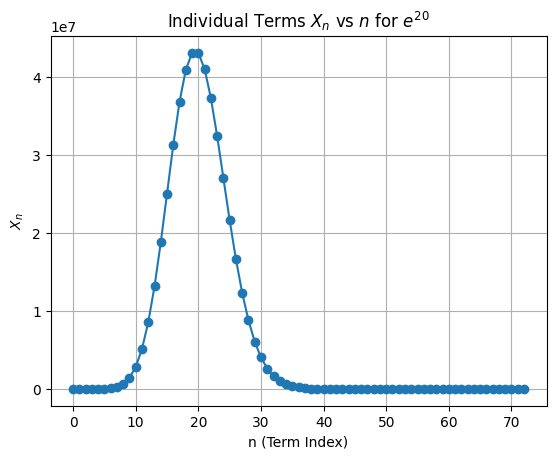

In [29]:
# PART 7

def plot_terms(x):
    _, terms, _ = exponential_rec(x)
    n_values = list(range(len(terms)))
    plt.plot(n_values, terms, marker='o')
    plt.title(f"Individual Terms $X_n$ vs $n$ for $e^{{{x}}}$")
    plt.xlabel("n (Term Index)")
    plt.ylabel("$X_n$")
    plt.grid()
    plt.show()

plot_terms(20)

In [30]:
# PART 8

def evaluate_and_compare_negative(x):
    recurrence_result, _, _ = exponential_rec(x)
    numpy_result = np.exp(x)
    discrepancy = abs(recurrence_result - numpy_result)
    print(f"Recurrence Relation Result for e^{x}: {recurrence_result}")
    print(f"NumPy Result for e^{x}: {numpy_result}")
    print(f"Discrepancy: {discrepancy}")

evaluate_and_compare_negative(-20)

Recurrence Relation Result for e^-20: 6.164184854939453e-09
NumPy Result for e^-20: 2.061153622438558e-09
Discrepancy: 4.1030312325008945e-09


In [31]:
# PART 9

def evaluate_negative_better(x):
    if x < 0:
        positive_result, _, _ = exponential_rec(-x)
        return 1 / positive_result
    else:
        return exponential_rec(x)[0]

def evaluate_both_methods(x):
    inefficient_result, _, _ = exponential_rec(x)
    efficient_result = evaluate_negative_better(x)
    numpy_result = np.exp(x)
    print(f"Inefficient Recurrence Relation Result for e^{x}: {inefficient_result}")
    print(f"Efficient Method Result for e^{x}: {efficient_result}")
    print(f"NumPy Result for e^{x}: {numpy_result}")
    print(f"Discrepancy (Efficient): {abs(efficient_result - numpy_result)}")
    print(f"Discrepancy (Inefficient): {abs(inefficient_result - numpy_result)}")

evaluate_both_methods(-20)

Inefficient Recurrence Relation Result for e^-20: 6.164184854939453e-09
Efficient Method Result for e^-20: 2.061153622438557e-09
NumPy Result for e^-20: 2.061153622438558e-09
Discrepancy (Efficient): 8.271806125530277e-25
Discrepancy (Inefficient): 4.1030312325008945e-09
